In [16]:
from transformers import pipeline
import language_tool_python # https://pypi.org/project/language-tool-python/
# -- Grammar check first
# -- translate 
# -- processing 

from grammartree import create_grammar_tree, check_grammar


In [ ]:
# check and extract grammar errors from dictionary 
example_text="Check the grammar of this sentence. It is an test sentence."
check_grammar(example_text)

Original text: Check the grammar of this sentence. It is an test sentence.
Corrected text: Check the grammar of this sentence. It is a test sentence.
Grammar issues found: 1


[Match({'ruleId': 'EN_A_VS_AN', 'message': 'Use “a” instead of ‘an’ if the following word doesn’t start with a vowel sound, e.g. ‘a sentence’, ‘a university’.', 'replacements': ['a'], 'offsetInContext': 43, 'context': '...eck the grammar of this sentence. It is an test sentence.', 'offset': 42, 'errorLength': 2, 'category': 'MISC', 'ruleIssueType': 'misspelling', 'sentence': 'It is an test sentence.'})]

In [18]:
# -- grammar node tree
grammar_var = check_grammar(example_text)

Original text: Check the grammar of this sentence. It is an test sentence.
Corrected text: Check the grammar of this sentence. It is a test sentence.
Grammar issues found: 1


In [28]:
create_grammar_tree(example_text)

Node('/Text: Check the grammar of this sentence. It is an test sentence.')
Node('/Text: Check the grammar of this sentence. It is an test sentence./Sentence Analysis')
Grammar Analysis Tree:
Text: Check the grammar of this sentence. It is an test sentence.
└── Sentence Analysis
    └── Grammar Issues
        └── Issue: EN_A_VS_AN
            ├── Message: Use “a” instead of ‘an’ if the following word doesn’t start with a vowel sound, e.g. ‘a sentence’, ‘a university’.
            ├── Context: ...eck the grammar of this sentence. It is an test sentence.
            └── Suggestions
                └── a

Tree visualization saved as 'grammar_tree.png'


In [33]:
#pipeline 
# Check grammar - translate - process - file.py ready
from translationpipeline import NLPTranslationPipeline

if __name__=="__main__":
    nlp_pipe = NLPTranslationPipeline(source_lang="en", target_lang="fr")
    nlp_pipe.process(example_text)


Device set to use mps:0


Original: Check the grammar of this sentence. It is an test sentence.
Grammar-corrected: Check the grammar of this sentence. It is a test sentence.
Translation (en → fr): Vérifiez la grammaire de cette phrase. C'est une phrase d'essai.


In [ ]:
# https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

sentences = [
    "That is a happy person",
    "That is a happy dog",
    "That is a very happy person",
    "Today is a sunny day"
]
embeddings = model.encode(sentences)

similarities = model.similarity(embeddings, embeddings)
print(similarities.shape)


torch.Size([4, 4])


In [35]:
similarities

tensor([[1.0000, 0.6946, 0.9429, 0.2569],
        [0.6946, 1.0000, 0.6211, 0.2491],
        [0.9429, 0.6211, 1.0000, 0.2106],
        [0.2569, 0.2491, 0.2106, 1.0000]])

In [36]:
# https://huggingface.co/spaces/evaluate-metric/bertscore
from evaluate import load
bertscore = load("bertscore")
predictions = ["hello there", "general kenobi"]
references = ["hello there", "general kenobi"]
results = bertscore.compute(predictions=predictions, references=references, lang="en")



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
results

{'precision': [0.9999998807907104, 1.000000238418579],
 'recall': [0.9999998807907104, 1.000000238418579],
 'f1': [0.9999998807907104, 1.000000238418579],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.49.0)'}

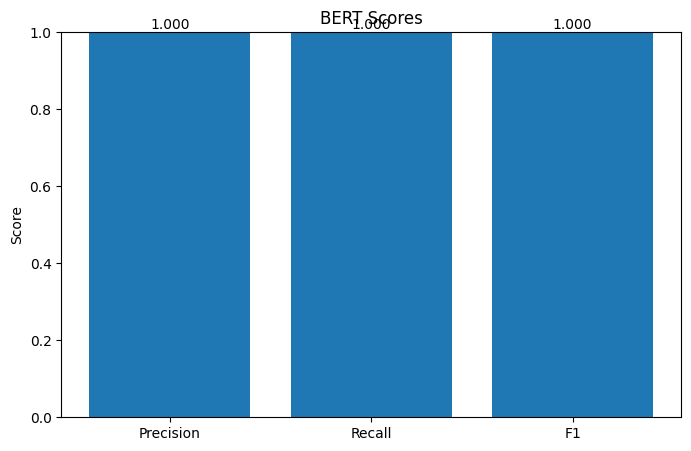

In [38]:
# plot - 
from plotScores import scoreplots
scoreplots(results['precision'][0], results['recall'][0], results['f1'][0])

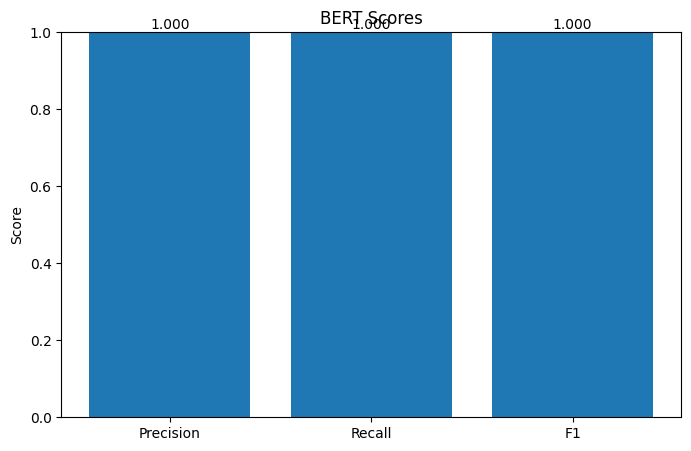

In [39]:
scoreplots(results['precision'][1], results['recall'][1], results['f1'][1])

In [ ]:
# Summarization with T5
# https://huggingface.co/docs/transformers/en/main_classes/pipelines
#TODO: fix summariozation pipeline 

OSError: t5 is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`